In [1]:
#reading bed files

import pandas as pd
import seaborn as sns
from matplotlib import pyplot
y=pd.read_table('young_K9m3_peaks_joined_cut_G167.bed',header=None)
o=pd.read_table('old_K9m3_peaks_joined_cut_G169.bed',header=None)
chs=['chr'+str(c) for c in list(range(1,20))]+['chrX','chrY']
y=y[y[0].isin(chs)]
o=o[o[0].isin(chs)]
y['batch']='young'
o['batch']='old'
y['d']=y[2]-y[1]
o['d']=o[2]-o[1]
df=y[['batch',0,'d']].append(o[['batch',0,'d']])

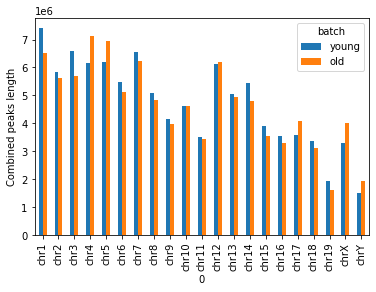

In [2]:
# charting young vs old

df=df.groupby(['batch',0]).sum('d').unstack().T
df=df.reset_index()
df.index=df[0]
df=df.loc[chs][[0,'young','old']]
ax=df.plot(kind='bar')
ax.set_ylabel("Combined peaks length");

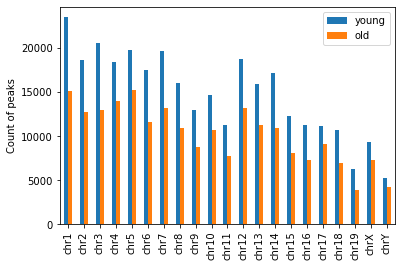

In [3]:
df=pd.DataFrame([y[0].value_counts(),o[0].value_counts()]).T.loc[chs]
df.columns=['young','old']
ax=df.plot(kind='bar')
ax.set_ylabel("Count of peaks");

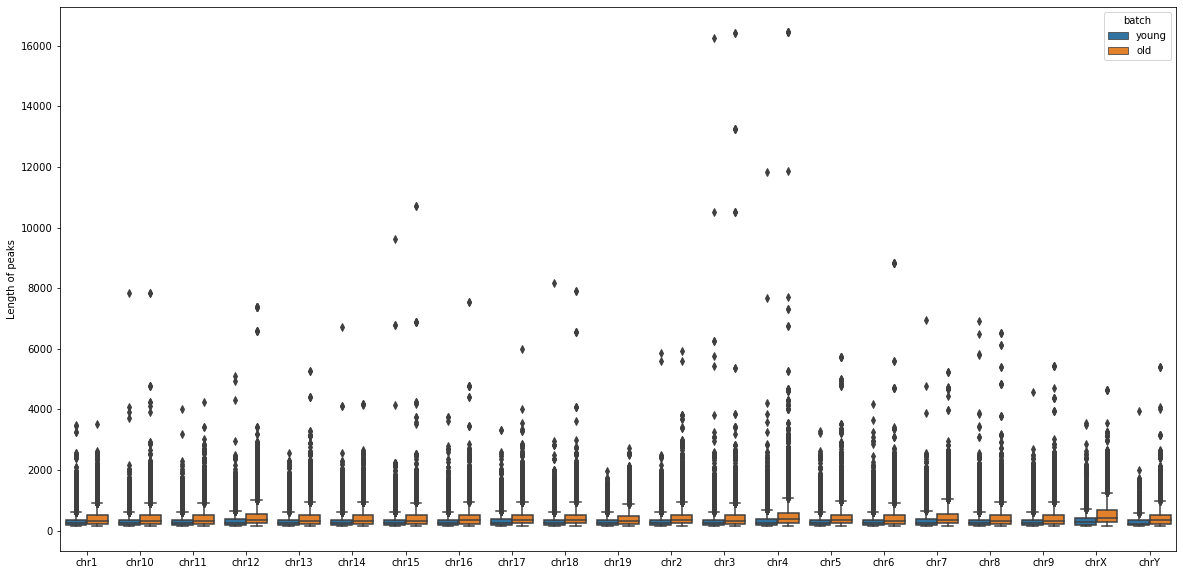

In [4]:
df=y[['batch',0,'d']].append(o[['batch',0,'d']])
df.sort_values('d')
df=df[df.d<20000]
fig, ax = pyplot.subplots(figsize=(20,10))
sns.boxplot(data=df,hue='batch',x=0,y='d',ax=ax)
ax.set_ylabel("Length of peaks");
ax.set_xlabel("");

In [5]:
# Calculating overlaps

b=[]
for c in chs:
    print(c,end=',')
    y=pd.read_table('young_K9m3_peaks_joined_cut_G167.bed',header=None)
    o=pd.read_table('old_K9m3_peaks_joined_cut_G169.bed',header=None)    
    y=y[y[0]==c]
    y['d']=y[2]-y[1]
    o=o[o[0]==c]
    o['d']=o[2]-o[1]
    y['r']=y.apply(lambda x:set(range(x[1],x[2])),1)
    o['r']=o.apply(lambda x:set(range(x[1],x[2])),1)
    yl=set.union(*y.r)
    ol=set.union(*o.r)
    ll=yl.intersection(ol)
    b.append(len(ll))

chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chrX,chrY,

In [6]:
y=pd.read_table('young_K9m3_peaks_joined_cut_G167.bed',header=None)
o=pd.read_table('old_K9m3_peaks_joined_cut_G169.bed',header=None)
chs=['chr'+str(c) for c in list(range(1,20))]+['chrX','chrY']
y=y[y[0].isin(chs)]
o=o[o[0].isin(chs)]
y['batch']='young'
o['batch']='old'
y['d']=y[2]-y[1]
o['d']=o[2]-o[1]

In [11]:
df=y[['batch',0,'d']].append(o[['batch',0,'d']])
df=df.groupby(['batch',0]).sum('d').unstack().T
df=df.reset_index()
df.index=df[0]
df=df.loc[chs][[0,'young','old']]

In [12]:
df['overlab']=b
df.head(1)

batch,0,young,old,overlab
0,,,,
chr1,chr1,7413461,6527188,4103463


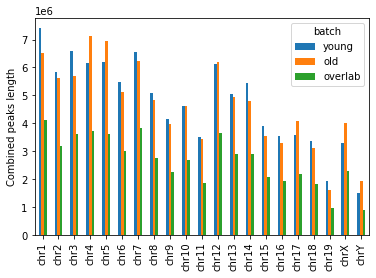

In [13]:
ax=df.plot(kind='bar')
ax.set_ylabel("Combined peaks length");
ax.set_xlabel("");

In [14]:
# Calculating differential peaks and finding correposnding genes 

genes=[]
y0=pd.read_table('young_K9m3_peaks_joined_cut_G167.bed',header=None)
o0=pd.read_table('old_K9m3_peaks_joined_cut_G169.bed',header=None) 
df0=pd.read_table('genes_ncbi.txt')
for c in chs:
    y_o=[]
    y_os=[]
    print(c,end=',')
    y=y0[y0[0]==c]
    y['d']=y[2]-y[1]
    o=o0[o0[0]==c]
    o['d']=o[2]-o[1]
    y['r']=y.apply(lambda x:set(range(x[1],x[2])),1)
    o['r']=o.apply(lambda x:set(range(x[1],x[2])),1)
    yl=set.union(*y.r)
    ol=set.union(*o.r)
    for index, row in y.iterrows():
        found=0
        for i in list(row['r']):
            if i in ol:
                found=1
                break
        if found==0:
            y_o.append(index)
    y_os=set.union(*y.loc[y_o].r)    
    df=df0[df0.chrom==c]    
    genes.append(df[df.txStart.apply(lambda x:x in (y_os))].index)

chr1,

/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chrX,chrY,

In [15]:
#writing the gene infromaton into text files
df0.loc[[item for sublist in genes for item in sublist]].to_csv('h3k9me3_loss_genes.txt')
df0.loc[[item for sublist in genes for item in sublist]].name2.to_csv('h3k9me3_loss_gene_names.txt',index=False,header=False)

In [16]:
# writing chr19 to bed file 

y=y[y[0]=='chr19']
y[range(5)].to_csv('y19.bed',header=False,index=False,sep='\t')
o=o[o[0]=='chr19']
o[range(5)].to_csv('o19.bed',header=False,index=False,sep='\t')